<a href="https://colab.research.google.com/github/TMeesters/Descriptive-Stats/blob/main/Day_2_EDV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Data analysis is better when it is hypothesis driven
# How to generate Hypotheses with EDA and EDV? - A case study
# Apologies in advance for the lack of comments so far

In [ ]:
financials = pd.read_csv('financials_loans.csv')
financials.head()

,Client ID,client_t,loan_t,date,Volume,Maturity,fixed component,variable component,fixed costs,Unitary profitability
0,297759463,small_corp,variable,01/07/2018,555437.50000,2793,0.015281,0.034139,103.250614,0.051455
1,271651132,small_indiv,variable,01/12/2016,444108.11330,3352,0.019273,0.052811,207.025475,0.064263
2,221756762,small_indiv,terms,01/05/2012,20220.89758,2093,0.016482,0.036044,134.481552,0.049888
3,586354981,small_corp,terms,01/01/2013,55223.75184,1049,0.017405,0.040345,92.255404,0.049888
4,343074535,small_corp,terms,01/01/2017,21869.87317,2728,0.015468,0.043747,233.841828,0.052334


In [ ]:
financials.shape

(266102, 10)

In [ ]:
financials['client_t'].unique()

array(['small_corp', 'small_indiv'], dtype=object)

In [ ]:
financials['loan_t'].unique()

array(['variable', 'terms'], dtype=object)

In [ ]:
financials['type']=financials['client_t']+'_'+financials['loan_t']
financials.head(2)

,Client ID,client_t,loan_t,date,Volume,Maturity,fixed component,variable component,fixed costs,Unitary profitability,type
0,297759463,small_corp,variable,01/07/2018,555437.5000,2793,0.015281,0.034139,103.250614,0.051455,small_corp_variable
1,271651132,small_indiv,variable,01/12/2016,444108.1133,3352,0.019273,0.052811,207.025475,0.064263,small_indiv_variable


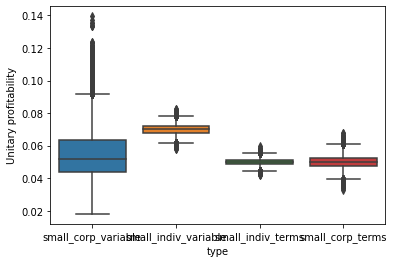

In [ ]:
sns.boxplot(x='type',y='Unitary profitability', data = financials)
plt.show()

In [ ]:
sm_corp_var = financials[financials['type']=='small_corp_variable']
sm_corp_var.head()

,Client ID,client_t,loan_t,date,Volume,Maturity,fixed component,variable component,fixed costs,Unitary profitability,type
0,297759463,small_corp,variable,01/07/2018,555437.5000,2793,0.015281,0.034139,103.250614,0.051455,small_corp_variable
5,262392350,small_corp,variable,01/08/2017,317392.8571,3339,0.026637,0.051593,188.477631,0.081117,small_corp_variable
6,328812009,small_corp,variable,01/11/2016,475000.0000,2599,0.018515,0.032979,213.533495,0.058692,small_corp_variable
8,69020604,small_corp,variable,01/10/2016,386391.3043,944,0.022835,0.046975,140.597643,0.066056,small_corp_variable
9,130212894,small_corp,variable,01/03/2013,386391.3043,1114,0.014659,0.036972,134.261741,0.058000,small_corp_variable


In [ ]:
sm_corp_var.shape

(71906, 11)

In [ ]:
sm_corp_var['Volume'].sum()

34178358375.4803

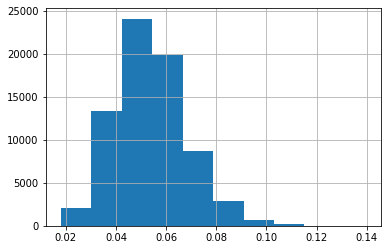

In [ ]:
sm_corp_var['Unitary profitability'].hist()
plt.show()

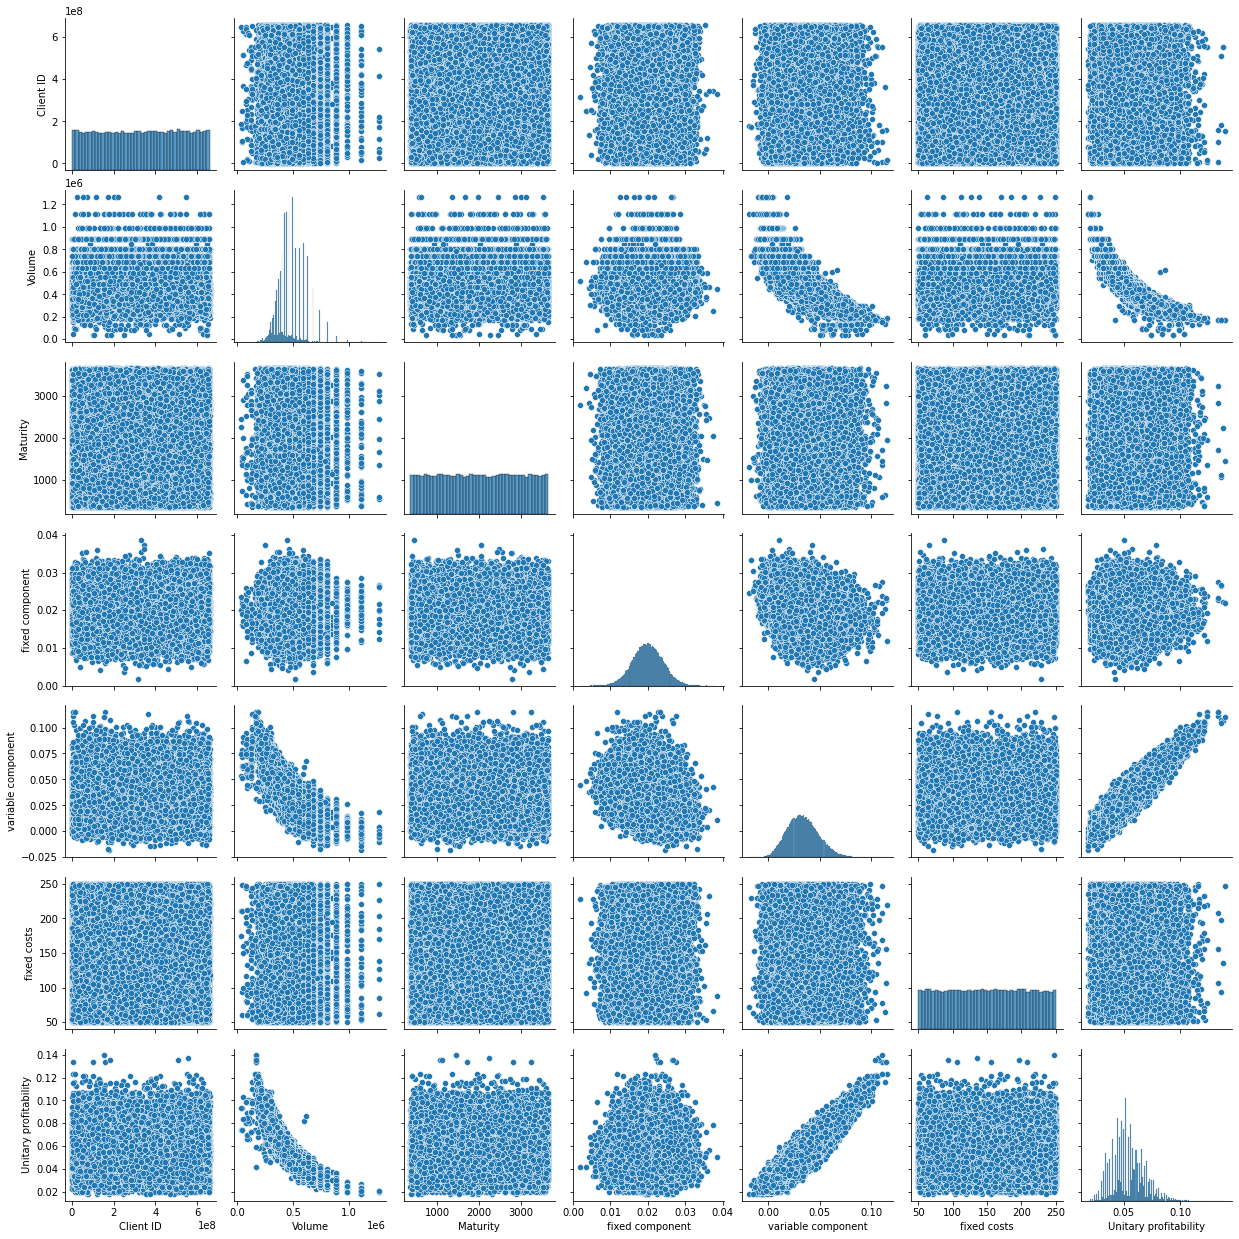

In [ ]:
sns.pairplot(sm_corp_var)
plt.show()

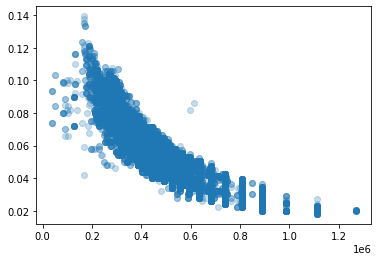

In [ ]:
plt.scatter(sm_corp_var['Volume'],sm_corp_var['Unitary profitability'],alpha=0.25)
plt.show()

In [ ]:
# large variance at low volumes, low at high...
# indication of fixed costs being the variance source

In [ ]:
# Which outliers do you pick?
# Think impact

In [ ]:
sm_corp_var[(sm_corp_var['Volume']>500000)&(sm_corp_var['Unitary profitability']>0.08)]

,Client ID,client_t,loan_t,date,Volume,Maturity,fixed component,variable component,fixed costs,Unitary profitability,type
182797,526349249,small_corp,variable,01/12/2014,598469.4787,2797,0.018830,0.062273,239.461378,0.082,small_corp_variable
238275,641828264,small_corp,variable,01/08/2012,613847.9476,1797,0.016353,0.067360,75.660693,0.086,small_corp_variable


In [ ]:
#now to handle the weird variance at low volumes? Take a peek
#any pattern jumps to mind?

In [ ]:
display(sm_corp_var[(sm_corp_var['Volume']>200000)&(sm_corp_var['Volume']<215000)&(sm_corp_var['Unitary profitability']>0.11)].head(10))
display(sm_corp_var[(sm_corp_var['Volume']>200000)&(sm_corp_var['Volume']<215000)&(sm_corp_var['Unitary profitability']<0.09)].head(10))

,Client ID,client_t,loan_t,date,Volume,Maturity,fixed component,variable component,fixed costs,Unitary profitability,type
4034,512021950,small_corp,variable,01/09/2018,206674.4186,3533,0.014555,0.104873,120.134747,0.114820,small_corp_variable
19536,134889681,small_corp,variable,01/04/2017,206674.4186,2544,0.016397,0.101700,148.615821,0.116820,small_corp_variable
25520,411367085,small_corp,variable,01/09/2018,206674.4186,2185,0.026111,0.087411,70.331705,0.110820,small_corp_variable
49283,599453040,small_corp,variable,01/02/2018,206674.4186,2385,0.016599,0.094743,220.125077,0.112820,small_corp_variable
55712,85534437,small_corp,variable,01/02/2018,201977.2727,1587,0.018541,0.093870,51.527837,0.114893,small_corp_variable
56223,616815132,small_corp,variable,01/03/2018,211595.2381,503,0.021732,0.093385,103.129750,0.110745,small_corp_variable
118634,246442612,small_corp,variable,01/07/2016,206674.4186,3453,0.017998,0.100906,116.460182,0.116820,small_corp_variable
160368,492086591,small_corp,variable,01/04/2017,206674.4186,2909,0.016934,0.097434,96.251336,0.114820,small_corp_variable
165758,3156972,small_corp,variable,01/02/2017,201977.2727,2283,0.016250,0.105228,152.738000,0.114893,small_corp_variable
183533,155312012,small_corp,variable,01/04/2017,211595.2381,2503,0.019272,0.094206,123.222758,0.110745,small_corp_variable


,Client ID,client_t,loan_t,date,Volume,Maturity,fixed component,variable component,fixed costs,Unitary profitability,type
4637,114779553,small_corp,variable,01/04/2016,211000.0,3148,0.018794,0.072410,54.259342,0.080000,small_corp_variable
8532,275814914,small_corp,variable,01/01/2013,209000.0,2728,0.018947,0.061051,102.926886,0.082000,small_corp_variable
11936,264376197,small_corp,variable,01/04/2014,211000.0,2275,0.012967,0.070533,151.641010,0.080000,small_corp_variable
24060,402133745,small_corp,variable,01/03/2014,206000.0,2751,0.018635,0.039214,172.411563,0.058000,small_corp_variable
30481,317333980,small_corp,variable,01/08/2015,209000.0,1629,0.020338,0.077189,83.104263,0.088000,small_corp_variable
35781,657697425,small_corp,variable,01/09/2014,210000.0,3048,0.015983,0.074051,53.398977,0.088000,small_corp_variable
47416,55248649,small_corp,variable,01/07/2013,211000.0,3198,0.022622,0.056568,60.209260,0.080000,small_corp_variable
50259,144704646,small_corp,variable,01/05/2013,212000.0,1251,0.021544,0.053397,148.421121,0.080000,small_corp_variable
68126,516916961,small_corp,variable,01/02/2013,211000.0,2551,0.017231,0.069625,197.155117,0.080000,small_corp_variable
68662,625546249,small_corp,variable,01/05/2016,214000.0,384,0.013864,0.060373,157.828482,0.074708,small_corp_variable


In [ ]:
#seems like time has something to do with it!

In [ ]:
#fist, type correction
sm_corp_var['date'].dtypes
sm_corp_var['date'] = sm_corp_var['date'].apply(pd.to_datetime)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
sm_corp_var.groupby('date').agg({'Unitary profitability':'mean'}).reset_index()
time_eda = sm_corp_var.groupby('date').agg({'Unitary profitability':'mean'}).reset_index()

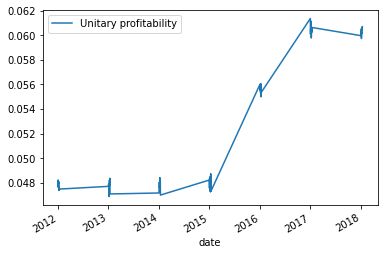

In [ ]:
time_eda.plot(kind='line',x='date',y='Unitary profitability')